In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
from math import pi
import itertools
import random

In [0]:
glob_range = 300
num_of_channels = 3

# APs/base stations(in this scenario) are placed on 2-D grid, at the centre of each hexagonal cell
# count : A static variable to keep the number of instantiations i.e #APs
# x,y : Denote the coordinates of the AP in 2-D plane
# channel : Channel # assigned to AP
# radius : hexagonal cell's circumcircle radius
class AP:
    count = 0
    
    def __init__(self, x, y, channel):
        AP.count += 1
        self.x = x
        self.y = y
        self.channel = channel
        self.radius = 86 #in meters

    def __str__(self):
        return "AP at (" + str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel)
        
    def in_hexagon(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        s = self.radius
        return y < 3**0.5 * min(s - x, s / 2)

# Sniffers are placed on 2-D grid each separated from other by 100 meters
# count : A static variable to keep the number of instantiations i.e #Sniffers
# x,y : Denote the coordinates of the Sniffer in 2-D plane
# channel : Channel # Monitired by Sniffer
# radius : Coverage radius in meters
# assigned_user : User monitired by this sniffer by any particular instant
class Sniffer:
    count = 0
    
    def __init__(self, x, y):
        Sniffer.count += 1
        self.x = x
        self.y = y
        self.channel = 0
        self.radius = 200
        self.assigned_user = -1
        
    def __str__(self):
        return "Sniffer at ("+ str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel)
        
    def in_range(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        r = self.radius
        return pow(x,2.0) + pow(y,2.0) <= pow(r,2.0)
    
    #To Find out the list of users in range
    def in_range_users(self, users):
        range_users = []
        for user in users:
            if self.in_range(user.x, user.y):
                range_users.append(user) 
        return range_users

    def assign_channel(self, channel):
        self.channel = channel
    
    def assign_user(self, channel, users):
        inrange_users = self.in_range_users(users)
#         inrange_users = random.shuffle(inrange_users)
        if(inrange_users is not None):
            for i,user in enumerate(inrange_users):
                if user.active and user.channel == self.channel:
                    self.assigned_user = i
                    break
        else:
            self.assigned_user = -1
            
# Users are placed on 2-D grid.
# count : A static variable to keep the number of instantiations i.e #Users
# x,y : Denote the coordinates of the user in 2-D plane
# channel : Channel # assigned to user
# active : Mantain User's activity
# activity_prob i.e Pu : User's transmission probability        
class User:
    count = 0
    
    def __init__(self, x, y):
        User.count += 1
        self.x = x
        self.y = y
        self.channel = 0  
        self.active = 0
        self.activity_prob = 0.3
        
    def __str__(self):
        return "User at ("+ str(self.x) + ", " + str(self.y) + ") and channel " + str(self.channel) + " and active " + str(self.active)
    
    # This function finds out the list of sniffers in range of user
    def in_range_sniffers(self, sniffers):
        range_sniffers = []
        for snif in sniffers:
            if snif.in_range(self.x, self.y):
                range_sniffers.append(snif)
        return range_sniffers
    
    # This function finds out the list of APs in range of user
    def access_point_in_range(self, aps):
        req = []
        for ap in aps:
            if ap.in_hexagon(self.x, self.y):
                self.channel = ap.channel
                break; 
    # This function perturbs the activity status of the User           
    def change_active(self):
        if np.random.rand() <= self.activity_prob:
            self.active = 1
        else:
            self.active = 0

In [0]:
sniffers = []
for i in range(0, glob_range, 200): # 0,200
    for j in range(0, glob_range, 200): #0,200
        sniffers.append(Sniffer(i,j))

In [4]:
  for snif in sniffers:
    print(snif)

Sniffer at (0, 0) and channel 0
Sniffer at (0, 200) and channel 0
Sniffer at (200, 0) and channel 0
Sniffer at (200, 200) and channel 0


In [0]:
aps = []
for i in range(0, glob_range, 86*3):
    for j in range(0, glob_range, 86*2):
        aps.append(AP(i,j,(i+j)%3))
        
for i in range(86+int(86/2), glob_range, 86*3):
    for j in range(-86, glob_range+86, 86*2):
        aps.append(AP(i,j, (i+j)%3))

In [6]:
for ap in aps:
    print(ap)

AP at (0, 0) and channel 0
AP at (0, 172) and channel 1
AP at (258, 0) and channel 0
AP at (258, 172) and channel 1
AP at (129, -86) and channel 1
AP at (129, 86) and channel 2
AP at (129, 258) and channel 0


In [0]:
users = []
for i in range(0, 100):
        x = np.random.uniform(low=0, high=glob_range, size=(1,))[0]
        y = np.random.uniform(low=0, high=glob_range, size=(1,))[0]
        curr_user = User(x, y)
        curr_user.access_point_in_range(aps)
        curr_user.change_active()
        users.append(curr_user)

In [8]:
for user in users:
    print(user)

User at (60.48286011270151, 71.79201572773661) and channel 2 and active 0
User at (149.40713089965084, 207.76070253919096) and channel 0 and active 0
User at (128.4641367598533, 131.7653782719559) and channel 2 and active 1
User at (103.40521365261756, 207.58113074187116) and channel 0 and active 0
User at (255.03038270589823, 267.94239869140426) and channel 0 and active 0
User at (89.00972777152919, 12.890806132322808) and channel 2 and active 1
User at (117.46440608990268, 148.43273569021184) and channel 2 and active 1
User at (249.92098347290067, 180.14756963986946) and channel 1 and active 0
User at (150.30126219553992, 186.77887314089824) and channel 0 and active 1
User at (183.64915725022433, 280.1958943640848) and channel 0 and active 1
User at (236.42252562182273, 200.66642499458217) and channel 1 and active 0
User at (112.89553514664685, 262.43513885973897) and channel 0 and active 1
User at (107.70804109130984, 161.1562066943571) and channel 0 and active 1
User at (276.088723

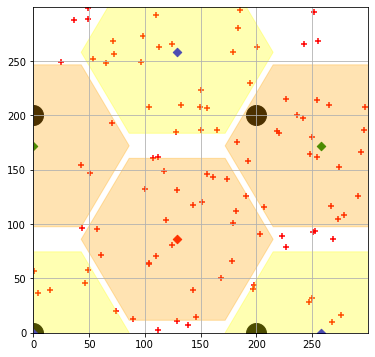

In [9]:
x = [a.x for a in sniffers]
y = [a.y for a in sniffers]

x0 = []
x1 = []
x2 = []
y0 = []
y1 = []
y2 = []

for a in aps:
    if a.channel == 0:
        x0.append(a.x)
        y0.append(a.y)
    elif a.channel == 1:
        x1.append(a.x)
        y1.append(a.y)
    else:
        x2.append(a.x)
        y2.append(a.y)        


x_u = [a.x for a in users]
y_u = [a.y for a in users]

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.set_xticks(np.arange(0, glob_range, 50))
ax.set_yticks(np.arange(0, glob_range, 50))

for i, a in enumerate(aps):
    if i%2 ==0:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="yellow", orientation=pi/2, alpha=0.3)
    else:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="orange", orientation=pi/2, alpha=0.3)
    ax.add_patch(circle)
    
plt.scatter(x,y, color='black',s=400)
plt.scatter(x0,y0, color='blue', marker="D")    
plt.scatter(x1,y1, color='green', marker="D")    
plt.scatter(x2,y2, color='red', marker="D")    
plt.scatter(x_u,y_u, marker = "+", color = "red")    

ax.set_xlim(0, glob_range)
ax.set_ylim(0, glob_range)
plt.grid()
plt.show()

In [0]:
#Returns 1 /0 whether there is a change in channel assignment to sniffer
#based on some randomly generated pattern
def get_iden(arr, channel, sniffer_assign):
    #print("Inside get_iden...")
    arr = np.array(arr)
    #print("arr : ",arr)
    sniffer_assign1 = np.array(sniffer_assign)
    #print("sniffer_assign : ",sniffer_assign1)
    #Find indices where arr's value is '1' 
    indices = np.where(arr > 0)[0]
    #print("indices : ",indices)
    flag = 1
    for index in indices:
        if channel != sniffer_assign1[index]:
            output = 0
            flag = 0
            break
    if flag == 1:
        output = 1

    return output
#Returns 1 /0 whether there is a change in channel assignment to user
#based on some randomly generated pattern
def get_y(arr, channel, user_assign):
    #print("Inside get_y...")
    global users
    arr = np.array(arr)
    #print("arr : ",arr)
    user_assign1 = np.array(user_assign)
    #print("user_assign : ",user_assign1)
    indices = np.where(arr > 0)[0]
    #print("indices : ",indices)
    start = user_assign1[indices[0]]
    if start == -1:
        return 0
    if channel != users[start].channel:
        return 0
    output = 1
    for index in indices[1:]:
        if start != user_assign1[index] or user_assign1[index] == -1:
            output = 0
            return output
      
    return output

In [0]:
def generate_phi(user_assign, sniffer_assign):
    n = len(sniffer_assign) # number of sniffers i.e 9
    #Generate string of 0's and 1's of linegth 'n'
    now = ["".join(seq) for seq in itertools.product("01", repeat=n)]
    #print("Before : ",now)
    #Remove strings which are all 0's
    now.remove("".join([str(0) for i in range(n)]))
    #print("After : ",now)
    phi = []
    y = []
    for a in now:
        #Get a string of 0's and 1's of length 'n'
        #print("Before : ",a)
        #Convert the string to a list
        a =  list(map(int, list(a)))
        #print("After : ",a)
        for channel in range(num_of_channels):
            phi.append(get_iden(a, channel, sniffer_assign))
            y.append(get_y(a, channel, user_assign))
    phi = np.array(phi)
    y = np.array(y)
    return (phi, y)

In [12]:
spanners = []

for channel in range(num_of_channels):
    #For finding the spanner set epsilon, assign same channel to all the sniffers
    for snif in sniffers:
        snif.assign_channel(channel)
    user_assign = [snif.assigned_user for snif in sniffers]

    sniffer_assign = [snif.channel for snif in sniffers]
    
    print("For channel # ",channel)
    print("user_assign : ",user_assign)
    print("sniffer_assign : ",sniffer_assign)
    spanners.append(generate_phi(user_assign, sniffer_assign)[0])

For channel #  0
user_assign :  [-1, -1, -1, -1]
sniffer_assign :  [0, 0, 0, 0]
For channel #  1
user_assign :  [-1, -1, -1, -1]
sniffer_assign :  [1, 1, 1, 1]
For channel #  2
user_assign :  [-1, -1, -1, -1]
sniffer_assign :  [2, 2, 2, 2]


In [0]:
phis = []
k = 0

In [0]:
def gen_all_phis(n , channel_assign):
    global phis, k
    if n == 0:
        return 
    snif1 = sniffers[n-1]
    for channel in range(num_of_channels):
        snif1.assign_channel(channel)
        k += 1
        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]
        gen_all_phis(n-1, sniffer_assign.copy())
        phis.append((sniffer_assign, generate_phi(user_assign, sniffer_assign)[0]))
        phis.append((sniffer_assign , generate_phi(user_assign, sniffer_assign)[0]))
    return phis

In [0]:
class ucb_agent():  
    def __init__(self,k,alpha,sniffers,spanners):
        self.arm_count = k #spanner size
        self.alpha = alpha #param
        self.N = np.ones(((2**sniffers-1)*k))
        self.trials = 1
        self.V = np.zeros((k,))
        self.mean = np.zeros((k,))
        self.theta = np.zeros(((2**sniffers-1)*k))
        self.spanners=spanners
        self.reward = [1]
        self.reward_avg = [1]
        self.arm = []
        self.switching_regret = [0]
        self.s_cost = 2 #switching cost

        
    def get_action(self):
        self.trials += 1
        out = np.argmax(self.V)
        
        self.reward_avg.append((self.mean[out]+(self.trials-1)*self.reward[-1])/self.trials)
        self.reward.append(self.mean[out])
        self.arm.append(out)
        try:
            if out != self.arm[-2]:
                self.switching_regret.append(self.switching_regret[-1]+self.s_cost)
            else:
                self.switching_regret.append(self.switching_regret[-1])
        except:
            pass
        return out
    
    def update_theta(self,Y,phi):
        self.theta = self.theta + (Y-self.theta)*phi/self.N
        self.N = self.N + np.absolute(phi)
        
    def update(self,Y,phi):
        scale = (self.alpha*np.log(self.trials))**0.5
        for i in range(self.arm_count):
            self.V[i] = self.mean[i] + (scale)*np.sum(((1/self.N)**0.5)*self.spanners[i])
            self.mean[i] = np.dot(self.theta,self.spanners[i])
        return

In [0]:
def get_regret(agent,spanners):
    optimal_index = np.argmax(agent.reward[1500:])+1500
    optimal = agent.arm[optimal_index-1]
    optimal_phi = spanners[optimal]
    reg = [0]
    for i in range(len(agent.arm)):
        reg.append(reg[-1]+(np.dot(optimal_phi,agent.theta)-np.dot(spanners[agent.arm[i]],agent.theta)))
    return reg

In [17]:
import tqdm
regret = []
s_regret = []
for trials in tqdm.tqdm(range(10)):
    spanners = []
    for channel in range(num_of_channels):
        for snif in sniffers:
            snif.assign_channel(channel)
        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]    
        spanners.append(generate_phi(user_assign, sniffer_assign)[0])


    agent = ucb_agent(k = num_of_channels, alpha=0.1, sniffers=len(sniffers), spanners=spanners)


    for action in range(num_of_channels):
        for i in users:
            i.change_active()
        for j in sniffers:
            j.assign_channel(action)
            j.assign_user(1,users)

        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]

        phi, Y = generate_phi(user_assign, sniffer_assign)
        agent.update(Y,phi)
        agent.update_theta(Y,phi)


    epoch_len =1
    epoch_counter = np.ones((2**len(sniffers) - 1)*num_of_channels)
    steps = 10000
    alpha = 1
    for t in range(steps):
        epoch_len -= 1
        for i in users:
            i.change_active()
        action = agent.get_action()
        for j in sniffers:
            j.assign_channel(action)
            j.assign_user(1,users)


        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]

        phi, Y = generate_phi(user_assign, sniffer_assign)
        if epoch_len<0:
            epoch_counter += np.absolute(phi)
            control = np.argmin(agent.N)
            epoch_len = (1+alpha)**(epoch_counter[control]) - (1+alpha)**(epoch_counter[control]-1)
            agent.update(Y,phi)
        agent.update_theta(Y,phi)
    s_regret.append(agent.switching_regret)
    regret.append(get_regret(agent=agent,spanners=spanners))
    
    

avg_regret = np.array(regret).mean(axis=0)
# plt.plot(avg_regret)

avg_s_regret = np.array(s_regret).mean(axis=0)
# plt.plot(avg_s_regret)

avg_tot_regret = avg_s_regret + avg_regret[:len(avg_s_regret)]
# plt.plot(avg_tot_regret)

100%|██████████| 10/10 [02:24<00:00, 14.40s/it]


In [18]:
import tqdm
regret = []
s_regret = []
for trials in tqdm.tqdm(range(10)):
    spanners = []
    for channel in range(num_of_channels):
        for snif in sniffers:
            snif.assign_channel(channel)
        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]    
        spanners.append(generate_phi(user_assign, sniffer_assign)[0])


    agent = ucb_agent(k = num_of_channels, alpha=0.1, sniffers=len(sniffers), spanners=spanners)

    epoch_len =1
    epoch_counter = np.ones((2**len(sniffers) - 1)*num_of_channels)
    steps = 10000
    alpha = 1
    for t in range(steps):
        epoch_len -= 1
        for i in users:
            i.change_active()
        action = agent.get_action()
        for j in sniffers:
            j.assign_channel(action)
            j.assign_user(1,users)


        user_assign = [snif.assigned_user for snif in sniffers]
        sniffer_assign = [snif.channel for snif in sniffers]

        phi, Y = generate_phi(user_assign, sniffer_assign)
        agent.update(Y,phi)
        agent.update_theta(Y,phi)
    s_regret.append(agent.switching_regret)
    regret.append(get_regret(agent=agent,spanners=spanners))

avg_regret_naive = np.array(regret).mean(axis=0)
# plt.plot(avg_regret_naive)

avg_s_regret_naive = np.array(s_regret).mean(axis=0)
# plt.plot(avg_s_regret_naive)

avg_tot_regret_naive = avg_s_regret_naive + avg_regret_naive[:len(avg_s_regret_naive)]
# plt.plot(avg_tot_regret_naive)

100%|██████████| 10/10 [02:27<00:00, 14.79s/it]


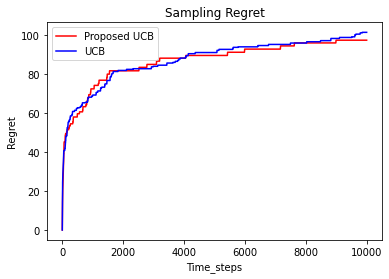

<Figure size 432x288 with 0 Axes>

In [19]:
x = list(range(10000))
plt.plot(x,avg_regret[:10000],c = "r",label="Proposed UCB")
plt.plot(x,avg_regret_naive[:10000],c = "b",label="UCB")
plt.xlabel("Time_steps")
plt.ylabel("Regret")
plt.title("Sampling Regret")
plt.legend()
plt.show()
plt.savefig("sampling_regret.png")

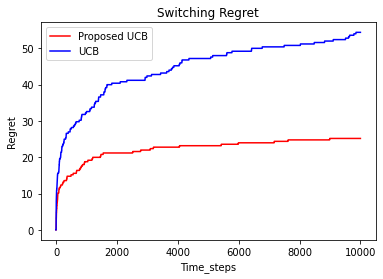

<Figure size 432x288 with 0 Axes>

In [20]:
x = list(range(10000))
plt.plot(x,avg_s_regret[:10000],c = "r",label = "Proposed UCB")
plt.plot(x,avg_s_regret_naive[:10000],c = "b",label = "UCB")
plt.xlabel("Time_steps")
plt.ylabel("Regret")
plt.title("Switching Regret")
plt.legend()
plt.show()
plt.savefig("switching_regret.png")

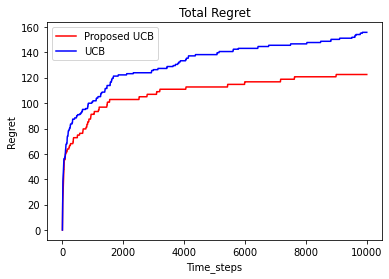

<Figure size 432x288 with 0 Axes>

In [21]:
x = list(range(10000))
plt.plot(x,avg_tot_regret[:10000],c = "r",label = "Proposed UCB")
plt.plot(x,avg_tot_regret_naive[:10000],c = "b",label = "UCB")
plt.xlabel("Time_steps")
plt.ylabel("Regret")
plt.title("Total Regret")
plt.legend()
plt.show()
plt.savefig("total_regret.png")

In [0]:
#: Size of the sliding window.
TAU = 1000

#: Default value for the constant `alpha`.
ALPHA = 1.0

In [0]:
class BasePolicy(object):
    """ Base class for any policy."""

    def __init__(self, nbArms, lower=0., amplitude=1.):
        # Parameters
        assert nbArms > 0, "Error: the 'nbArms' parameter of a {} object cannot be <= 0.".format(self)  # DEBUG
        self.nbArms = nbArms  #: Number of arms
        self.lower = lower  #: Lower values for rewards
        assert amplitude > 0, "Error: the 'amplitude' parameter of a {} object cannot be <= 0.".format(self)  # DEBUG
        self.amplitude = amplitude  #: Larger values for rewards
        # Internal memory
        self.t = 0  #: Internal time
        self.pulls = np.zeros(nbArms, dtype=int)  #: Number of pulls of each arms
        self.rewards = np.zeros(nbArms)  #: Cumulated rewards of each arms

    def __str__(self):
        """ -> str"""
        return self.__class__.__name__

    # --- Start game, and receive rewards

    def startGame(self):
        """ Start the game (fill pulls and rewards with 0)."""
        self.t = 0
        self.pulls.fill(0)
        self.rewards.fill(0)
    
    # It's faster to define two methods and pick one
    # (one test in init, that's it)
    # rather than doing the test in the method
    def getReward(self, arm, reward):
      """ Give a reward: increase t, pulls, and update cumulated sum of rewards for that arm (normalized in [0, 1])."""
      self.t += 1
      self.pulls[arm] += 1
      reward = (reward - self.lower) / self.amplitude
      self.rewards[arm] += reward

    # --- Basic choice()

    def choice(self):
        """ Not defined."""
        raise NotImplementedError("This method choice() has to be implemented in the child class inheriting from BasePolicy.")
    

In [0]:
class IndexPolicy(BasePolicy):
    """ Class that implements a generic index policy."""

    def __init__(self, nbArms, lower=0., amplitude=1.):
        """ New generic index policy.
        - nbArms: the number of arms,
        - lower, amplitude: lower value and known amplitude of the rewards.
        """
        super(IndexPolicy, self).__init__(nbArms, lower=lower, amplitude=amplitude)
        self.index = np.zeros(nbArms)  #: Numerical index for each arms

    # --- Start game, and receive rewards

    def startGame(self):
        """ Initialize the policy for a new game."""
        super(IndexPolicy, self).startGame()
        self.index.fill(0)

    def computeIndex(self, arm):
        """ Compute the current index of arm 'arm'."""
        raise NotImplementedError("This method computeIndex(arm) has to be implemented in the child class inheriting from IndexPolicy.")

    def computeAllIndex(self):
        """ Compute the current indexes for all arms. Possibly vectorized, by default it can *not* be vectorized automatically."""
        for arm in range(self.nbArms):
            self.index[arm] = self.computeIndex(arm)

    # --- Basic choice() method

    def choice(self):
        r""" In an index policy, choose an arm with maximal index (uniformly at random):
        .. warning:: In almost all cases, there is a unique arm with maximal index, so we loose a lot of time with this generic code, but I couldn't find a way to be more efficient without loosing generality.
        """
        # I prefer to let this be another method, so child of IndexPolicy only needs to implement it (if they want, or just computeIndex)
        self.computeAllIndex()
        # Uniform choice among the best arms
        try:
            return np.random.choice(np.nonzero(self.index == np.max(self.index))[0])
        except ValueError:
            print("Warning: unknown error in IndexPolicy.choice(): the indexes were {} but couldn't be used to select an arm.".format(self.index))
            return np.random.randint(self.nbArms)

    

In [0]:
class SWUCB(IndexPolicy):
    r""" An experimental policy, using only a sliding window (of for instance `tau=1000` *steps*, not counting draws of each arms) instead of using the full-size history.
    """

    def __init__(self, nbArms,
                 tau=TAU, alpha=ALPHA,
                 *args, **kwargs):
        super(SWUCB, self).__init__(nbArms, *args, **kwargs)
        # New parameters
        assert 1 <= tau, "Error: parameter 'tau' for class SWUCB has to be >= 1, but was {}.".format(tau)  # DEBUG
        self.tau = int(tau)  #: Size `tau` of the sliding window.
        assert alpha > 0, "Error: parameter 'alpha' for class SWUCB has to be > 0, but was {}.".format(alpha)  # DEBUG
        self.alpha = alpha  #: Constant `alpha` in the square-root in the computation for the index.
        # Internal memory
        self.last_rewards = np.zeros(tau)  #: Keep in memory all the rewards obtained in the last `tau` steps.
        self.last_choices = np.full(tau, -1)  #: Keep in memory the times where each arm was last seen.

    def __str__(self):
        return r"SW-UCB($\tau={}${})".format(
            self.tau,
            ", $\alpha={:.3g}$".format(self.alpha) if self.alpha != ALPHA else "",
        )

    def getReward(self, arm, reward):
        """Give a reward: increase t, pulls, and update cumulated sum of rewards and update small history (sliding window) for that arm (normalized in [0, 1]).
        """
        now = self.t % self.tau
        # Get reward, normalized to [0, 1]
        reward = (reward - self.lower) / self.amplitude
        # We have seen it one more time
        self.last_choices[now] = arm
        # Store it in place for the empirical average of that arm
        self.last_rewards[now] = reward
        self.t += 1

    def computeIndex(self, arm):
        last_pulls_of_this_arm = np.count_nonzero(self.last_choices == arm)
        if last_pulls_of_this_arm < 1:
            return float('+inf')
        else:
            return (np.sum(self.last_rewards[self.last_choices == arm]) / last_pulls_of_this_arm) + sqrt((self.alpha * log(min(self.t, self.tau))) / last_pulls_of_this_arm)


In [0]:
class KBanditProblem:
    def __init__(self, k, stationary=False):
        self.k = k
        self.stationary = stationary
        self.values = np.random.normal(loc=0.0, scale=1, size=k)
        self.optimal = self.values.argmax()
        
    def generate_reward(self, action):
        if not self.stationary:
            self.values += np.random.normal(loc=0.0, scale=0.01, size=self.k)
            self.optimal = self.values.argmax()
        return np.random.normal(loc=self.values[action], scale=1)


In [0]:
class KBanditSolution:
    def __init__(self, problem, steps):
        self.problem = problem
        self.steps = steps
        self.my_policy = SWUCB(num_of_channels**len(sniffers))#in MAB, number of Arms = num_of_channels**num_of_sniffers in Sniffer-channel assignment problem
        self.my_policy.startGame() 
        
        self.average_reward = 0
        self.average_rewards = np.array([])
        self.optimal_percentage = 0
        self.optimal_precentages = np.array([])

    def print_rewards(self):
        p_steps = np.arange(self.steps)
        plt.plot(p_steps,self.average_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average_rewards')
        plt.title("Steps vs Average_rewards")
        plt.legend()
        plt.show()
    
    def print_optimal_percentages(self):
        p_steps = np.arange(self.steps)
        plt.plot(p_steps,self.optimal_precentages)
        plt.xlabel('Steps')
        plt.ylabel('Optimal_percentages')
        plt.title("Steps vs Optimal_percentages")
        plt.legend()
        plt.show() 
    def count_statistics(self, action, reward, step):
        self.average_reward += (1 / (step + 1)) * (reward - self.average_reward)
        self.optimal_percentage += (1 / (step + 1)) * ((1 if action == self.problem.optimal else 0) - self.optimal_percentage)
        self.average_rewards = np.append(self.average_rewards, self.average_reward)
        self.optimal_precentages = np.append(self.optimal_precentages, self.optimal_percentage)

In [0]:
import sys
import math

In [0]:
class UCB(KBanditSolution):
    def __init__(self,problem, steps):
        super(UCB, self).__init__(problem, steps)

    def count_ucb(self, q, c, step, n):
        if n == 0:
            return sys.maxsize
        return (q + (c * math.sqrt((math.log10(step) / n))))
    
    def solve(self, c):
        Q = {i: 0 for i in range(num_of_channels**len(sniffers))} # 1. Value function        
        N = {i: 0 for i in range(num_of_channels**len(sniffers))} # 2. Number of actions, for update rule

        for i in range(self.steps): # 3. Main loop
            Q_ucb = {i: self.count_ucb(Q[i], c, i + 1, N[i]) for i in range(num_of_channels**len(sniffers))} # 4. Count UCB
            #action = max(Q_ucb, key=Q_ucb.get) # 5. Choose action with maximum UCB
            action = my_policy.choice()

            reward = self.problem.generate_reward(action) # 6. Get reward for current action
            N[action] += 1 # 7. Update action number
            Q[action] += (1 / N[action]) * (reward - Q[action]) # 8. Update value dict 
            self.count_statistics(action, reward, i)

No handles with labels found to put in legend.


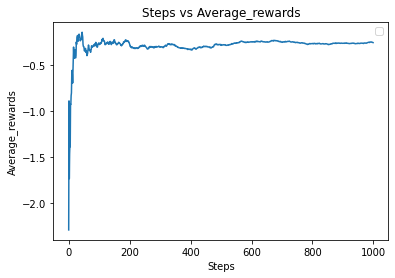

In [105]:
my_ns_prob = KBanditProblem(num_of_channels**len(sniffers))
my_ucb = UCB(my_ns_prob,TAU)
my_ucb.solve(1.5)
my_ucb.print_rewards()

No handles with labels found to put in legend.


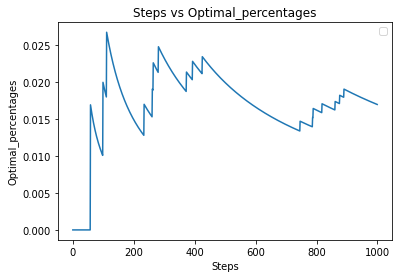

In [106]:
my_ucb.print_optimal_percentages()

In [0]:
class UCB(IndexPolicy):
    """ The UCB policy for bounded bandits.
    - Reference: [Lai & Robbins, 1985].
    """

    def computeIndex(self, arm):
        if self.pulls[arm] < 1:
            return float('+inf')
        else:
            return (self.rewards[arm] / self.pulls[arm]) + sqrt((2 * log(self.t)) / self.pulls[arm])

    def computeAllIndex(self):
        """ Compute the current indexes for all arms, in a vectorized manner."""
        indexes = (self.rewards / self.pulls) + np.sqrt((2 * np.log(self.t)) / self.pulls)
        indexes[self.pulls < 1] = float('+inf')
        self.index[:] = indexes

In [0]:
#: Default parameter for alpha
ALPHA = 1
ALPHA = 4


class UCBalpha(UCB):
    """ The UCB1 (UCB-alpha) index policy, modified to take a random permutation order for the initial exploration of each arm (reduce collisions in the multi-players setting).
    Reference: [Auer et al. 02].
    """

    def __init__(self, nbArms, alpha=ALPHA, lower=0., amplitude=1.):
        super(UCBalpha, self).__init__(nbArms, lower=lower, amplitude=amplitude)
        assert alpha >= 0, "Error: the alpha parameter for UCBalpha class has to be >= 0."  # DEBUG
        self.alpha = alpha  #: Parameter alpha

    def __str__(self):
        return r"UCB($\alpha={:.3g}$)".format(self.alpha)

    def computeIndex(self, arm):
        r""" Compute the current index, at time t and after :math:`N_k(t)` pulls of arm k:
        .. math:: I_k(t) = \frac{X_k(t)}{N_k(t)} + \sqrt{\frac{\alpha \log(t)}{2 N_k(t)}}.
        """
        if self.pulls[arm] < 1:
            return float('+inf')
        else:
            return (self.rewards[arm] / self.pulls[arm]) + sqrt((self.alpha * log(self.t)) / (2 * self.pulls[arm]))

    def computeAllIndex(self):
        """ Compute the current indexes for all arms, in a vectorized manner."""
        indexes = (self.rewards / self.pulls) + np.sqrt((self.alpha * np.log(self.t)) / (2 * self.pulls))
        indexes[self.pulls < 1] = float('+inf')
        self.index[:] = indexes

In [0]:
#: Default parameter for alpha.
ALPHA = 1

#: Default parameter for gamma.
GAMMA = 0.99


class DiscountedUCB(UCBalpha):

    def __init__(self, nbArms,
                 alpha=ALPHA, gamma=GAMMA,
                 useRealDiscount=True,
                 *args, **kwargs):
        super(DiscountedUCB, self).__init__(nbArms, *args, **kwargs)
        self.discounted_pulls = np.zeros(nbArms)  #: Number of pulls of each arms
        self.discounted_rewards = np.zeros(nbArms)  #: Cumulated rewards of each arms
        assert alpha >= 0, "Error: the 'alpha' parameter for DiscountedUCB class has to be >= 0."  # DEBUG
        self.alpha = alpha  #: Parameter alpha
        assert 0 < gamma <= 1, "Error: the 'gamma' parameter for DiscountedUCB class has to be 0 < gamma <= 1."  # DEBUG
        if np.isclose(gamma, 1):
            print("Warning: using DiscountedUCB with 'gamma' too close to 1 will result in UCBalpha, you should rather use it...")  # DEBUG
        self.gamma = gamma  #: Parameter gamma
        self.delta_time_steps = np.zeros(self.nbArms, dtype=int)  #: Keep memory of the :math:`\Delta_k(t)` for each time step.
        self.useRealDiscount = useRealDiscount  #: Flag to know if the real update should be used, the one with a multiplication by :math:`\gamma^{1+\Delta_k(t)}` and not simply a multiplication by :math:`\gamma`.

    def __str__(self):
        return r"D-UCB({}$\gamma={:.5g}${})".format(
            "no delay, " if not self.useRealDiscount else "",
            self.gamma,
            ", $\alpha={:.3g}$".format(self.alpha) if self.alpha != ALPHA else "",
        )

    def getReward(self, arm, reward):
        super(DiscountedUCB, self).getReward(arm, reward)
        # FIXED we should multiply by gamma^delta where delta is the number of time steps where we didn't play this arm, +1
        self.discounted_pulls *= self.gamma
        self.discounted_rewards *= self.gamma
        self.discounted_pulls[arm] += 1
        reward = (reward - self.lower) / self.amplitude
        self.discounted_rewards[arm] += reward
        # XXX self.discounted_pulls[arm] += 1  # if we were using N_k(t) and not N_{k,gamma}(t).
        # Ok and we saw this arm so no delta now
        if self.useRealDiscount:
            self.delta_time_steps += 1  # increase delay for each algorithms
            self.delta_time_steps[arm] = 0

    def computeIndex(self, arm):
        if self.discounted_pulls[arm] < 1:
            return float('+inf')
        else:
            n_t_gamma = np.sum(self.discounted_pulls)
            assert n_t_gamma <= self.t, "Error: n_t_gamma was computed as {:.3g} but should be < t = {:.3g}...".format(n_t_gamma, self.t)  # DEBUG
            return (self.discounted_rewards[arm] / self.discounted_pulls[arm]) + sqrt((self.alpha * log(n_t_gamma)) / (2 * self.discounted_pulls[arm]))

    def computeAllIndex(self):
        """ Compute the current indexes for all arms, in a vectorized manner."""
        n_t_gamma = np.sum(self.discounted_pulls)
        assert n_t_gamma <= self.t, "Error: n_t_gamma was computed as {:.3g} but should be < t = {:.3g}...".format(n_t_gamma, self.t)  # DEBUG
        indexes = (self.discounted_rewards / self.discounted_pulls) + np.sqrt((self.alpha * np.log(n_t_gamma)) / (2 * self.discounted_pulls))
        indexes[self.discounted_pulls < 1] = float('+inf')
        self.index[:] = indexes



In [0]:
class KBanditSolution_DUCB:
    def __init__(self, problem, steps):
        self.problem = problem
        self.steps = steps
        self.my_policy = DiscountedUCB(num_of_channels**len(sniffers))#in MAB, number of Arms = num_of_channels**num_of_sniffers in Sniffer-channel assignment problem
        self.my_policy.startGame() 
        
        self.average_reward = 0
        self.average_rewards = np.array([])
        self.optimal_percentage = 0
        self.optimal_precentages = np.array([])

    def print_rewards(self):
        p_steps = np.arange(self.steps)
        plt.plot(p_steps,self.average_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average_rewards')
        plt.title("Steps vs Average_rewards")
        plt.legend()
        plt.show()
    
    def print_optimal_percentages(self):
        p_steps = np.arange(self.steps)
        plt.plot(p_steps,self.optimal_precentages)
        plt.xlabel('Steps')
        plt.ylabel('Optimal_percentages')
        plt.title("Steps vs Optimal_percentages")
        plt.legend()
        plt.show() 
    def count_statistics(self, action, reward, step):
        self.average_reward += (1 / (step + 1)) * (reward - self.average_reward)
        self.optimal_percentage += (1 / (step + 1)) * ((1 if action == self.problem.optimal else 0) - self.optimal_percentage)
        self.average_rewards = np.append(self.average_rewards, self.average_reward)
        self.optimal_precentages = np.append(self.optimal_precentages, self.optimal_percentage)

In [0]:
class DUCB(KBanditSolution_DUCB):
    def __init__(self,problem, steps):
        super(DUCB, self).__init__(problem, steps)

    def count_ucb(self, q, c, step, n):
        if n == 0:
            return sys.maxsize
        return (q + (c * math.sqrt((math.log10(step) / n))))
    
    def solve(self, c):
        Q = {i: 0 for i in range(num_of_channels**len(sniffers))} # 1. Value function        
        N = {i: 0 for i in range(num_of_channels**len(sniffers))} # 2. Number of actions, for update rule

        for i in range(self.steps): # 3. Main loop
            Q_ucb = {i: self.count_ucb(Q[i], c, i + 1, N[i]) for i in range(num_of_channels**len(sniffers))} # 4. Count UCB
            #action = max(Q_ucb, key=Q_ucb.get) # 5. Choose action with maximum UCB
            action = my_policy.choice()

            reward = self.problem.generate_reward(action) # 6. Get reward for current action
            N[action] += 1 # 7. Update action number
            Q[action] += (1 / N[action]) * (reward - Q[action]) # 8. Update value dict 
            self.count_statistics(action, reward, i)

No handles with labels found to put in legend.


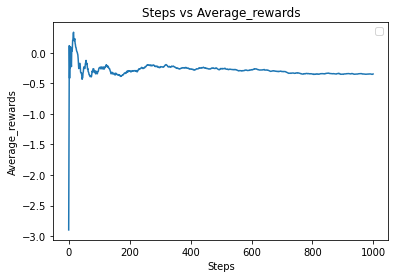

In [119]:
my_ducb = DUCB(my_ns_prob,TAU)
my_ducb.solve(1.5)
my_ducb.print_rewards()

No handles with labels found to put in legend.


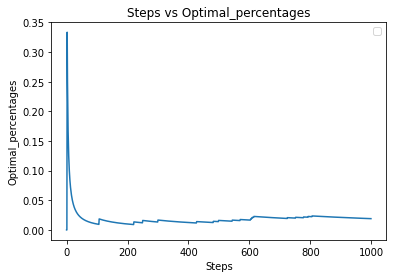

In [120]:
my_ducb.print_optimal_percentages()